Prject title

About project

About Data

Table of content

In [138]:

# importing libraries 
import statsmodels.api as sm 
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [139]:
# loading the  dataset  
df = pd.read_excel(r"C:\Users\jonly\OneDrive\Coding Stuff\Project Ideas\prescription fill rate prediction\dataset synthetic2.xlsx")

df['rx_id'] = df['rx_id'].astype(str)
df['patient_id'] = df['patient_id'].astype(str)

In [140]:
df.head()

,rx_id,patient_id,generic_name,gender,annual_salary,is_healthcare_major,is_filled
0,1,1,apixaban,m,30000,1,1
1,2,2,apixaban,f,40000,1,1
2,3,3,apixaban,m,35000,1,1
3,4,4,apixaban,f,34000,1,1
4,5,5,apixaban,m,50000,1,1


Exploratory

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rx_id                198 non-null    object
 1   patient_id           198 non-null    object
 2   generic_name         198 non-null    object
 3   gender               198 non-null    object
 4   annual_salary        198 non-null    int64 
 5   is_healthcare_major  198 non-null    int64 
 6   is_filled            198 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 11.0+ KB


In [142]:
df.describe()

,annual_salary,is_healthcare_major,is_filled
count,198.000000,198.000000,198.000000
mean,39603.898990,0.454545,0.494949
std,32391.043815,0.499192,0.501242
min,3000.000000,0.000000,0.000000
25%,11875.000000,0.000000,0.000000
50%,34000.000000,0.000000,0.000000
75%,53000.000000,1.000000,1.000000
max,140000.000000,1.000000,1.000000


In [143]:
df['generic_name'].value_counts()

apixaban    198
Name: generic_name, dtype: int64

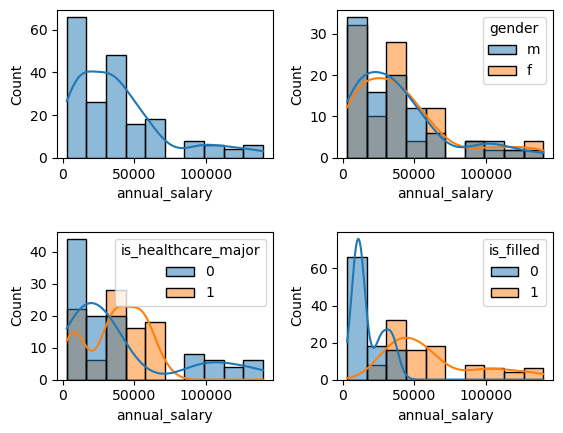

In [144]:
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df, x='annual_salary', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='annual_salary', kde=True, hue='gender', ax=axes[0, 1])
sns.histplot(data=df, x='annual_salary', kde=True, hue='is_healthcare_major', ax=axes[1, 0])
sns.histplot(data=df, x='annual_salary', kde=True, hue='is_filled', ax=axes[1, 1])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

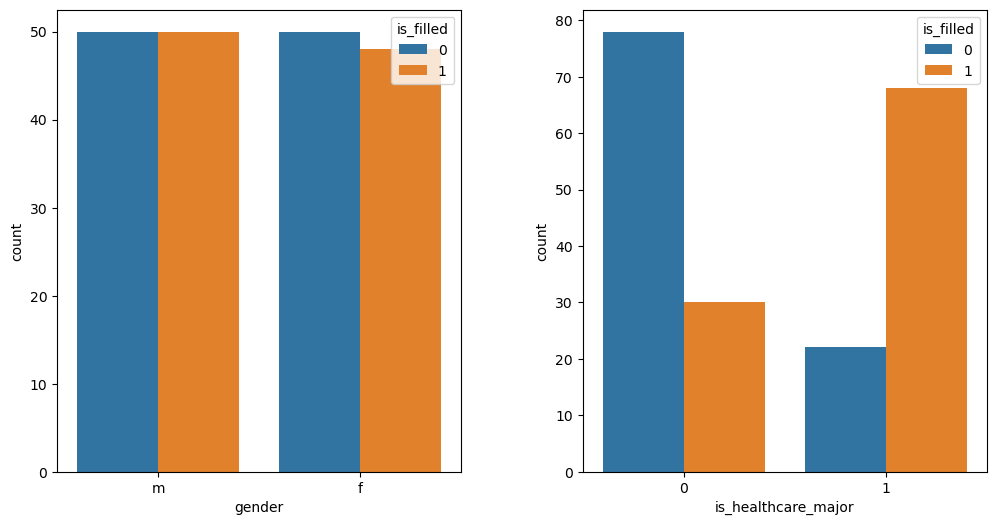

In [145]:
fig, axes = plt.subplots(1, 2 , figsize=(12, 6))
sns.countplot(data = df,x=df['gender'],hue=df['is_filled'],  ax=axes[0])
sns.countplot(data = df,x=df['is_healthcare_major'],hue=df['is_filled'],ax=axes[1])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Model

In [146]:
gender = pd.get_dummies(df['gender'], drop_first=True).rename(columns={'m':'gender_m'})
gender

,gender_m
0,1
1,0
2,1
3,0
4,1
...,...
193,1
194,0
195,1
196,0


In [147]:
df.drop('gender',axis=1,inplace=True)
df = pd.concat([df,gender], axis=1)
df

,rx_id,patient_id,generic_name,annual_salary,is_healthcare_major,is_filled,gender_m
0,1,1,apixaban,30000,1,1,1
1,2,2,apixaban,40000,1,1,0
2,3,3,apixaban,35000,1,1,1
3,4,4,apixaban,34000,1,1,0
4,5,5,apixaban,50000,1,1,1
...,...,...,...,...,...,...,...
193,194,194,apixaban,8000,1,0,1
194,195,195,apixaban,9000,1,0,0
195,196,196,apixaban,10000,1,0,1
196,197,197,apixaban,11000,1,0,0


In [148]:
X =df[['gender_m','annual_salary','is_healthcare_major']]

y= df[['is_filled']]

In [149]:
y

,is_filled
0,1
1,1
2,1
3,1
4,1
...,...
193,0
194,0
195,0
196,0


In [150]:
# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [151]:
X_train

,gender_m,annual_salary,is_healthcare_major
124,0,70000,1
97,0,11000,1
42,1,120000,0
17,0,60000,1
5,0,60000,1
...,...,...,...
133,1,100000,0
137,1,97000,0
72,1,11500,0
140,0,111000,0


In [152]:
y_train

,is_filled
124,1
97,0
42,1
17,1
5,1
...,...
133,1
137,1
72,0
140,1


In [153]:
# building the model and fitting the data 
log_reg = sm.Logit(y_train, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.515917
         Iterations 6


In [154]:
print(dir(log_reg))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_get_wald_nonlinear', '_transform_predict_exog', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_distribution', 'get_influence', 'get_margeff', 'get_prediction', 'im_ratio', 'info_criteria', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'method', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generali

In [155]:
# printing the summary table 
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:              is_filled   No. Observations:                  138
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                  0.2539
Time:                        21:14:26   Log-Likelihood:                -71.197
converged:                       True   LL-Null:                       -95.422
Covariance Type:            nonrobust   LLR p-value:                 3.012e-11
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gender_m               -1.7036      0.394     -4.328      0.000      -2.475      -0.932
annual_salary        2.997e-05   7.39e-06      4.053      0.000    1.55e-05    4.45e-05
is_healthcare_ma

analysis

prediction

In [171]:
# performing predictions on the test dataset 
yhat = log_reg.predict(X_test)
yhat.head(5)

175    0.222013
40     0.923642
34     0.784805
90     0.396507
145    0.309096
dtype: float64

In [163]:
 
prediction = list(map(round, yhat))
#prediction = (yhat>= 0.5).astype(int)
actual = y_test.values.flatten()
actual = [', '.join(map(str, actual))]

    
# comparing original and predicted values of y 
print('Actual values', actual) 
print('Predictions :', prediction) 

Actual values ['0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0']
Predictions : [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]


In [158]:
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[13 14]
 [ 2 31]]
Test accuracy =  0.7333333333333333
